# Dynamical Power Spectra (on real data)

Here, we use an RXTE observation of the LMXB 4U 1636-536 (e.g. [Belloni et al. 2007](https://doi.org/10.1111/j.1365-2966.2007.11943.x)). This source shows strong kHz QPOs, and this notebook will demonstrate how to detect and track the QPO frequency.

In [1]:
%matplotlib inline

In [2]:
# load auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# import stingray
import stingray

plt.style.use('seaborn-v0_8-talk')

# All starts with a lightcurve..

Open the example file. It can be downloaded from [here](https://drive.google.com/file/d/1frt_3ETYA0ehgHFiOhroBHUs3-mgw9OB/view?usp=sharing)

In [3]:
events = stingray.EventList.read("SE1_7ceb190-7cec25b.evt.gz", fmt="ogip")

Let's create a Lightcurve from the Events time of arrival witha a given time resolution

In [4]:
lc = events.to_lc(dt=1)

<AxesSubplot: xlabel='Time (s)', ylabel='counts'>

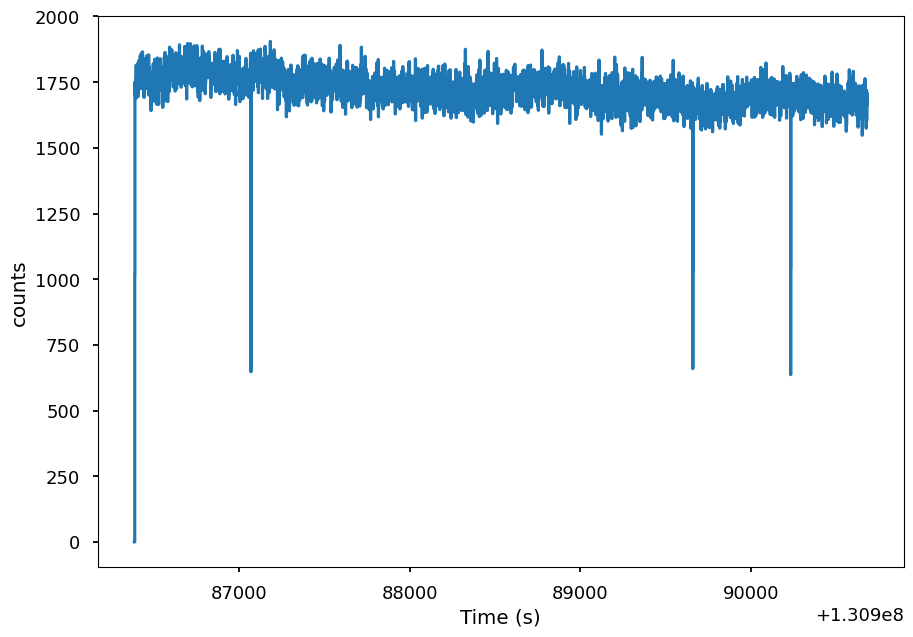

In [5]:
lc.plot()

Let's see what the periodogram looks like:

4296it [00:00, 13627.62it/s]


<AxesSubplot: xlabel='Frequency (Hz)', ylabel='Power (leahy)'>

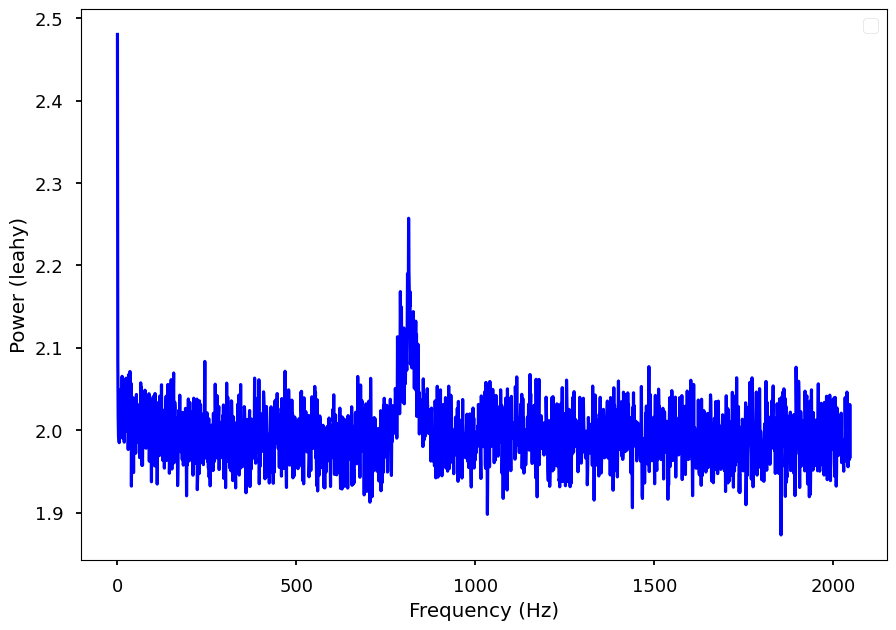

In [6]:
# Note the use of a power of 2 for dt. RXTE data can behave badly if we don't do that.
ps = stingray.AveragedPowerspectrum(events, dt=1/4096, segment_size=1, norm='leahy')
ps.plot()

A QPO!

# DynamicPowerspectrum

Let's create a dynamic powerspectrum with the a segment size of 16s and the powers with a "leahy" normalization. We will use this to see if the frequency of the QPO is stable or it changes over time.

In [7]:
dynspec = stingray.DynamicalPowerspectrum(events, sample_time=1/4096, segment_size=1, norm='leahy')

4296it [00:00, 15818.78it/s]


The dyn_ps attribute stores the power matrix, each column corresponds to the powerspectrum of each segment of the light curve

In [8]:
dynspec.dyn_ps

array([[2.86142014e+02, 2.21404652e+00, 4.49974561e+00, ...,
        1.67625425e+00, 6.00745863e-02, 1.56656876e+00],
       [3.08720461e+01, 3.72558781e+00, 1.50197819e+00, ...,
        9.41301441e-01, 8.74504661e-01, 7.77072089e+00],
       [6.55459927e+00, 2.47765550e+00, 4.84945565e+00, ...,
        3.46383838e+00, 4.50184348e-01, 2.24257145e+00],
       ...,
       [1.39660007e+00, 8.01728092e-01, 6.49434961e-01, ...,
        1.77991810e+00, 9.01248772e+00, 2.23014832e+00],
       [6.64803568e-01, 3.67539077e+00, 8.14022349e-03, ...,
        1.67739661e+00, 1.29050497e+00, 1.82808498e+00],
       [1.56362131e-01, 2.62837187e+00, 3.48806670e+00, ...,
        2.44281615e+00, 6.93147056e-01, 1.79838829e+00]])

To plot the DynamicalPowerspectrum matrix, we use the attributes `time`  and `freq` to set the extend of the image axis. have a look at the documentation of matplotlib's `imshow()`.

Text(0, 0.5, 'Frequency (Hz)')

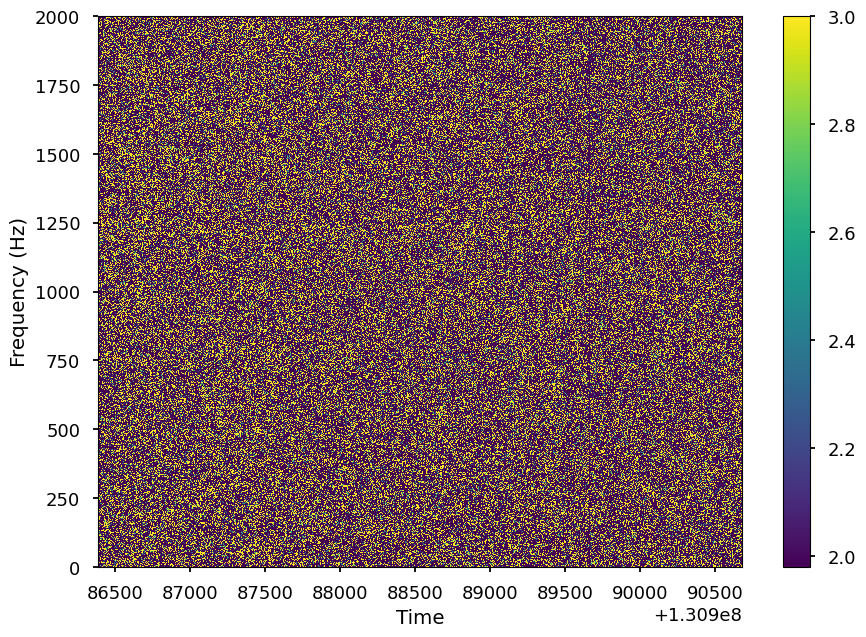

In [9]:
extent = min(dynspec.time), max(dynspec.time), max(dynspec.freq), min(dynspec.freq)

plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=1.98, vmax=3.0,
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(0,2000)

plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

Text(0, 0.5, 'Frequency (Hz)')

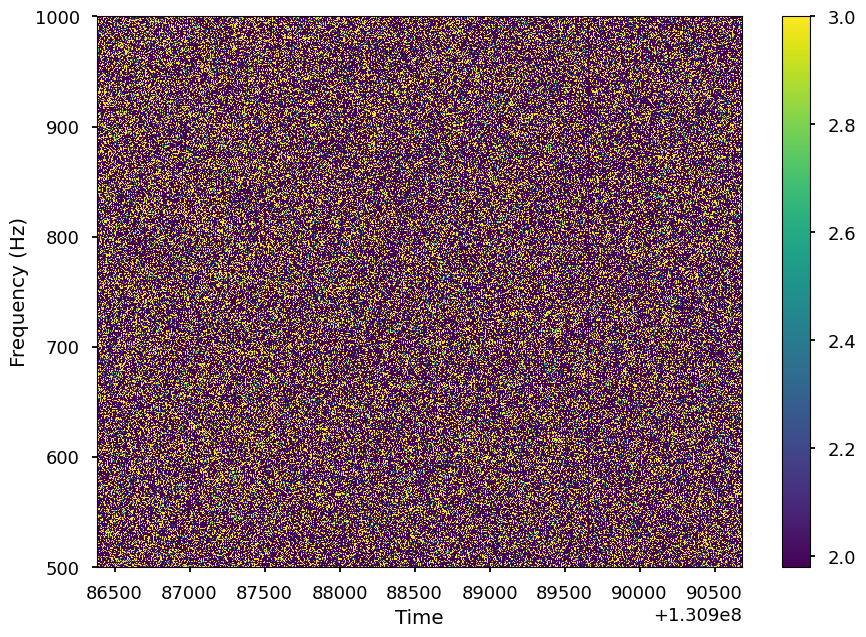

In [10]:
extent = min(dynspec.time), max(dynspec.time), max(dynspec.freq), min(dynspec.freq)

plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=1.98, vmax=3.0,
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(500,1000)
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

Mh. Can't see anything here. Let's try to rebin data a little, to get a better signal-to-noise ratio.

---

 # Rebinning in Frequency

In [11]:
print("The current frequency resolution is {}".format(dynspec.df))

The current frequency resolution is 1.0


Let's rebin to a frequency resolution of 2 Hz and using the average of the power

In [12]:
dynspec = dynspec.rebin_frequency(df_new=2.0, method="average")

In [13]:
print("The new frequency resolution is {}".format(dynspec.df))

The new frequency resolution is 2.0


Let's see how the Dynamical Powerspectrum looks now

Text(0, 0.5, 'Frequency (Hz)')

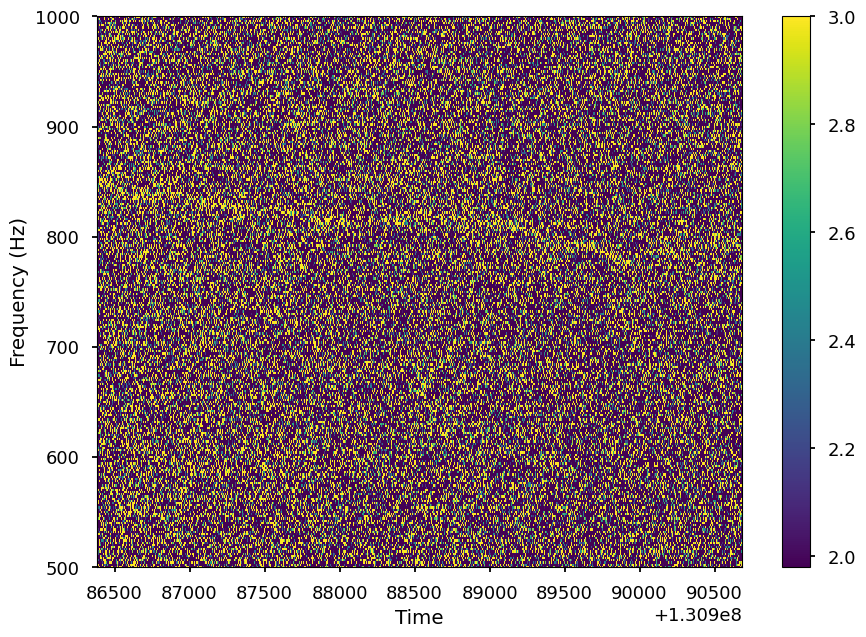

In [14]:
extent = min(dynspec.time), max(dynspec.time), min(dynspec.freq), max(dynspec.freq)
plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=1.98, vmax=3.0,
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(500, 1000)
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

Text(0, 0.5, 'Frequency (Hz)')

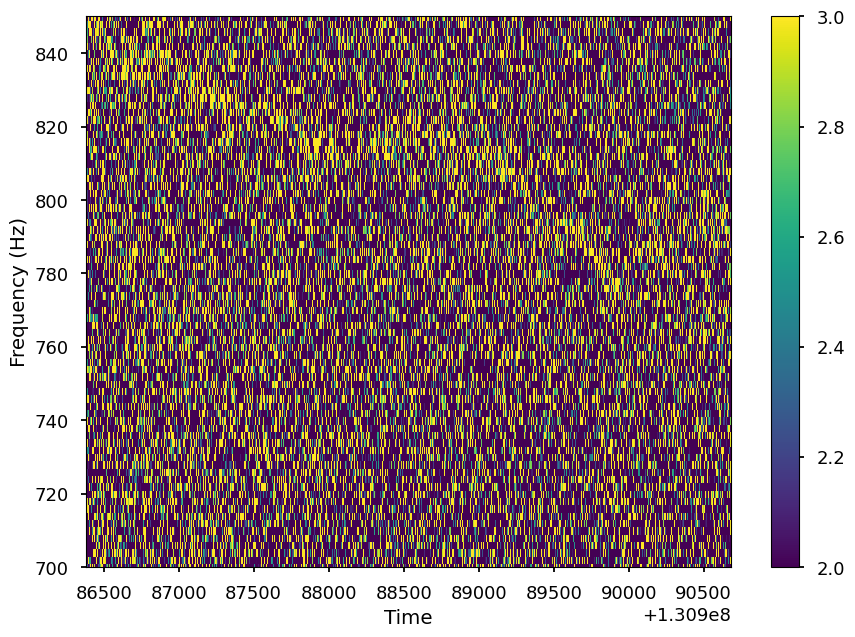

In [15]:
extent = min(dynspec.time), max(dynspec.time), min(dynspec.freq), max(dynspec.freq)
plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=2.0, vmax=3.0,
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(700,850)
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

Something appears! It looks like the QPO is changing its frequency. Let's now try to also rebin a little in time!

# Rebin time

Let's try to improve the visualization by rebinnin our matrix in the time axis

In [16]:
print("The current time resolution is {}".format(dynspec.dt))

The current time resolution is 1


Let's rebin to a time resolution of 64 s

In [17]:
dynspec = dynspec.rebin_time(dt_new=64.0, method="average")

In [18]:
print("The new time resolution is {}".format(dynspec.dt))

The new time resolution is 64.0


Text(0, 0.5, 'Frequency (Hz)')

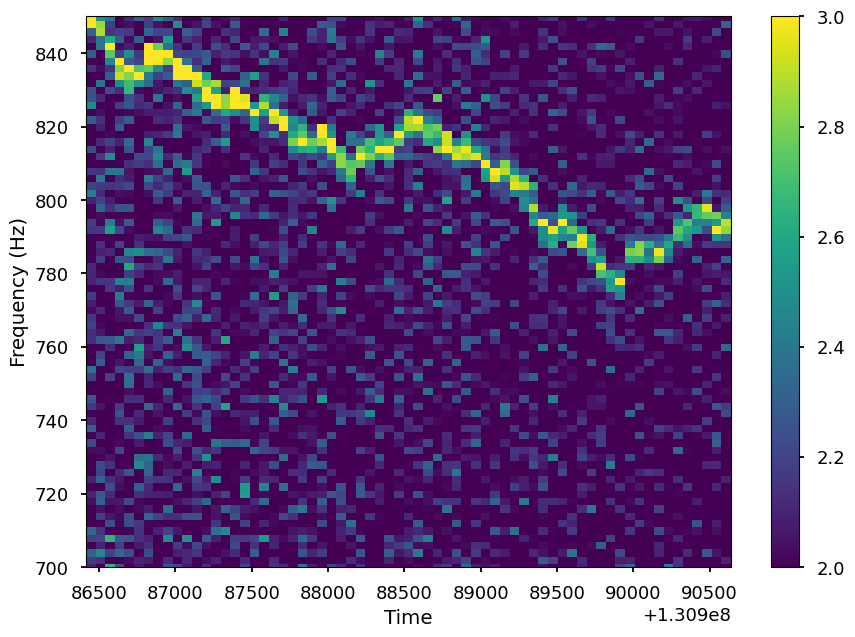

In [19]:
extent = min(dynspec.time), max(dynspec.time), min(dynspec.freq), max(dynspec.freq)
plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=2.0, vmax=3.0,
           interpolation="none", extent=extent)
plt.colorbar()
plt.ylim(700,850)
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

Now the change of the QPO frequency is clear. Erratic, but clear.

# Trace maximun

Let's use the method `trace_maximum()` to find the index of the maximum on each powerspectrum in a certain frequency range. For example, between 755 and 782Hz)

In [20]:
tracing = dynspec.trace_maximum(min_freq=755, max_freq=850)

This is how the trace function looks like

Text(0, 0.5, 'Frequency (Hz)')

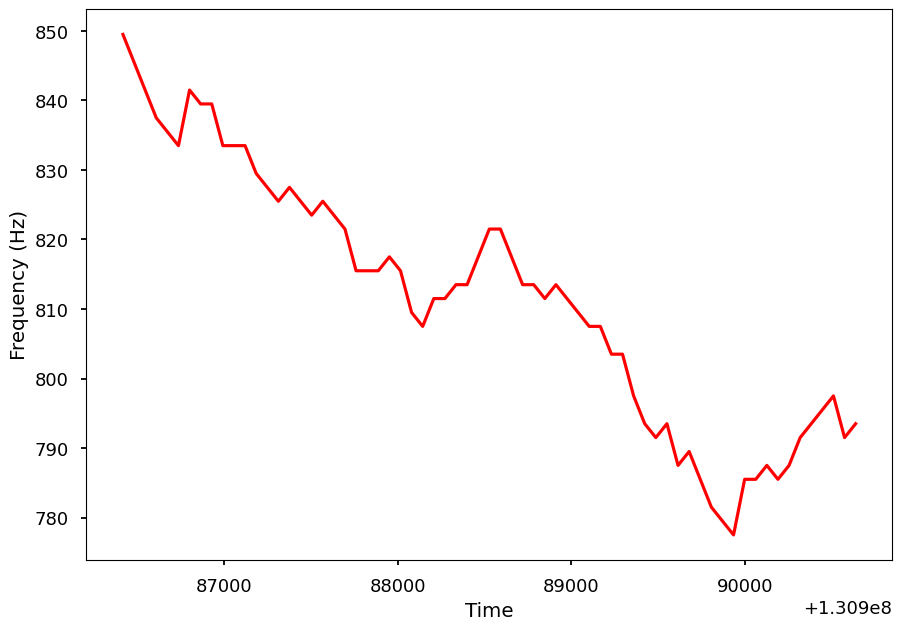

In [21]:
plt.plot(dynspec.time, dynspec.freq[tracing], color='red', alpha=1)

plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

Let's plot it on top of the dynamic spectrum

Text(0, 0.5, 'Frequency (Hz)')

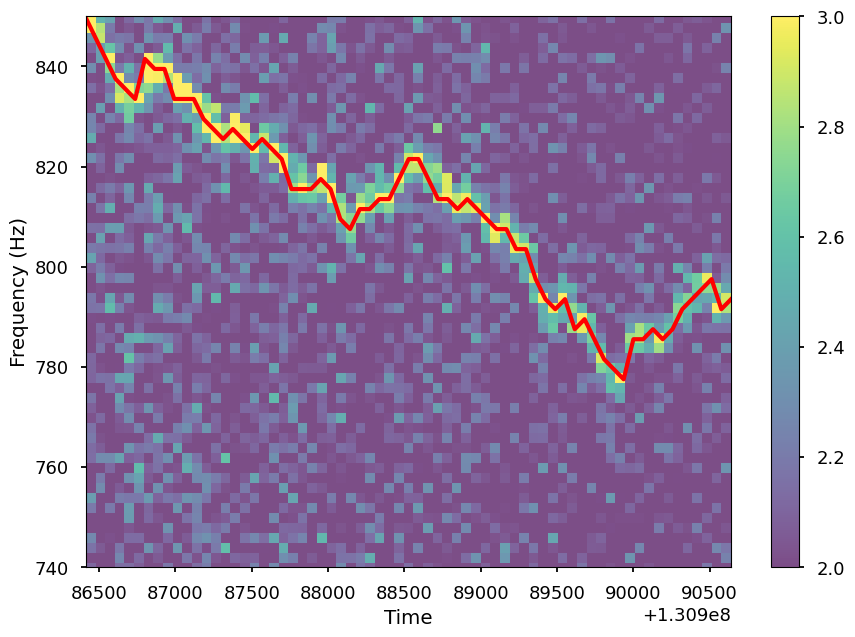

In [22]:
extent = min(dynspec.time), max(dynspec.time), min(dynspec.freq), max(dynspec.freq)
plt.imshow(dynspec.dyn_ps, origin="lower", aspect="auto", vmin=2.0, vmax=3.0,
           interpolation="none", extent=extent, alpha=0.7)
plt.colorbar()
plt.ylim(740,850)
plt.plot(dynspec.time, dynspec.freq[tracing], color='red', lw=3, alpha=1)
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

This method is, of course, prone to errors in noisy data. We'll try to get better methods implemented in the future!

In the meantime, a Savitzky-Golay filter is often good enough to cut away outliers:

Text(0, 0.5, 'Frequency (Hz)')

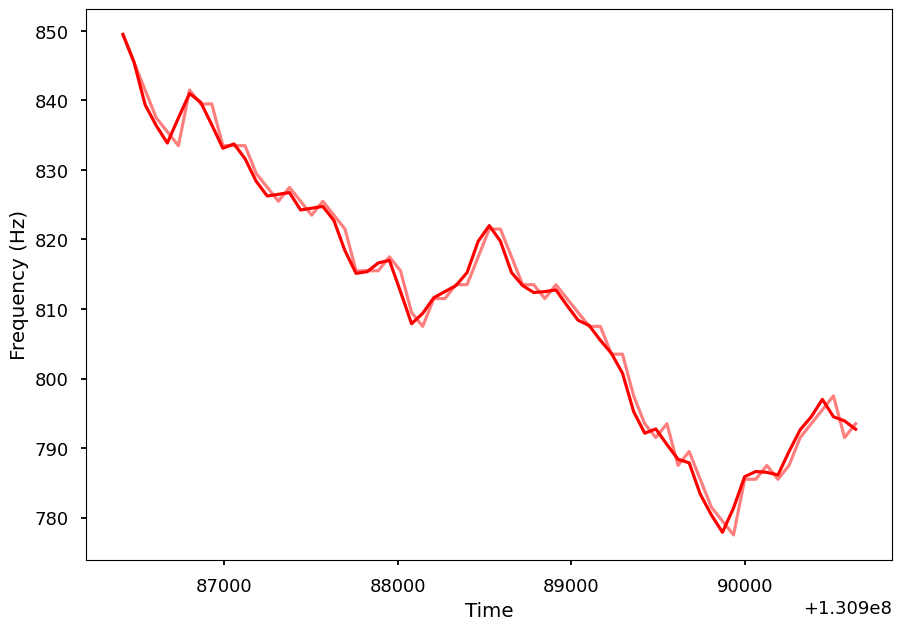

In [23]:
from scipy.signal import savgol_filter

plt.plot(dynspec.time, dynspec.freq[tracing], color='red', alpha=0.5)
plt.plot(dynspec.time, savgol_filter(dynspec.freq[tracing], 4, 2), color='red', alpha=1)
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")

# Shifting-and-adding

Shift-and-add is a technique used to improve the detection of QPOs ([Méndez et al. 1998](https://doi.org/10.1086/311600)). Basically, the spectrum is calculated in many segments, just as in the dynamical power spectrum above, but then the single spectra are shifted so that they are centered in the variable frequency of the followed feature. 
This technique is implemented in Stingray's Dynamic Cross- and Powerspectrum. We can apply it here, using the `trace_maximum` functionality from the sections above.


(500.0, 1000.0)

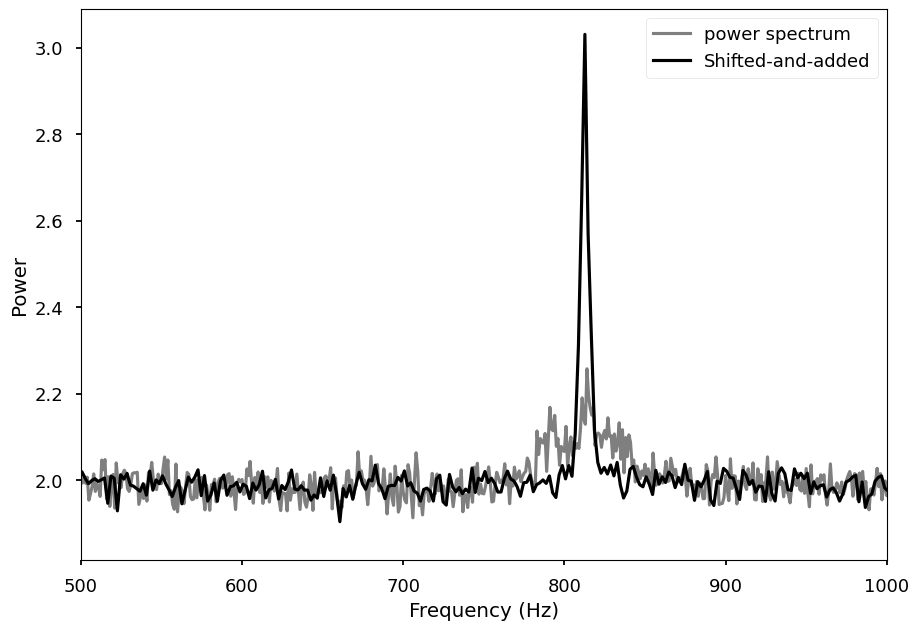

In [24]:
f0_list = dynspec.freq[tracing]

new_spec = dynspec.shift_and_add(f0_list, nbins=500)

# Let's compare it to the original power spectrum.
plt.plot(ps.freq, ps.power, label='power spectrum', alpha=0.5, color="k")
plt.plot(new_spec.freq, new_spec.power, label='Shifted-and-added', color="k")

plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.xlim([500, 1000])

Ta da!